In [1]:
import main
import plot_inequality as plot_ineq
import importlib
import io_manager
import numpy as np

of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
input_path = main_path + "input/50p_age_moms/"
trans_path_uncond = input_path + "MH_trans_uncond_age.csv"

trans_path_50p = input_path + "MH_trans_by_MH_clust_age.csv"
type_path_50p = input_path + "MH_clust_50p_age_pop_shares.csv"

trans_path_k2 = input_path + "MH_trans_by_MH_clust_k2_age_age.csv"
type_path_k2 = input_path + "MH_clust_k2_age_pop_shares.csv"

do_dpi_calib = False
output_flag = False
myPars, myShocks, sols, sims = main.main_io(main_path, out_folder_name = of_name, 
                                            H_trans_uncond_path = trans_path_uncond, H_trans_path = trans_path_k2, H_type_pop_share_path = type_path_k2,
                                            output_flag = output_flag, do_dpi_calib = do_dpi_calib)

*****Running main_io with default out_folder_name*****
Solver ran in 7.065106299996842 seconds
Calibrating with alpha_lab_targ = 0.33497447, w0_mean_targ = 2.1988928, w0_sd_targ = 0.29847395, 
                                        w1_targ = 0.2928040000000003, w2_targ = 0.2746706000000003, wH_targ = 0.051316846, phi_H_targ = 0.053118114,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 4 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 5 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating 

In [2]:
from pars_shocks import Pars, Shocks
myShocks = Shocks(myPars)
H_hist = myShocks.H_hist
beg = H_hist[:, :, :, 0]
share_good_beg = np.mean(beg)
share_bad_beg = 1 - share_good_beg
print(f"share_bad_beg: {share_bad_beg}, share_good_beg: {share_good_beg}")

print(myPars.H_beg_pop_weights_by_H_type)
print(myPars.H_type_perm_weights)
wLow = myPars.H_type_perm_weights[0]
wHigh = myPars.H_type_perm_weights[1]
share_bad_low = myPars.H_beg_pop_weights_by_H_type[0,0]
share_bad_high = myPars.H_beg_pop_weights_by_H_type[1,0]
share_bad = share_bad_low * wLow + share_bad_high * wHigh
print(f"share_bad: {share_bad}")

share_bad_beg: 0.4345, share_good_beg: 0.5655
[[0.77777779 0.22222222]
 [0.09223301 0.907767  ]]
[0.56993735 0.43006262]
share_bad: 0.48295058245254274


   age  mean_badMH
0   25    0.482951
1   26    0.488518
2   27    0.478290
3   28    0.454662
4   29    0.460761


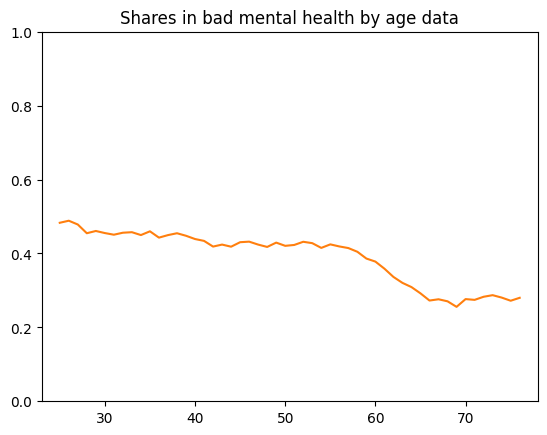

[0.48240711 0.48546257 0.51162205 0.4757115  0.50096499]


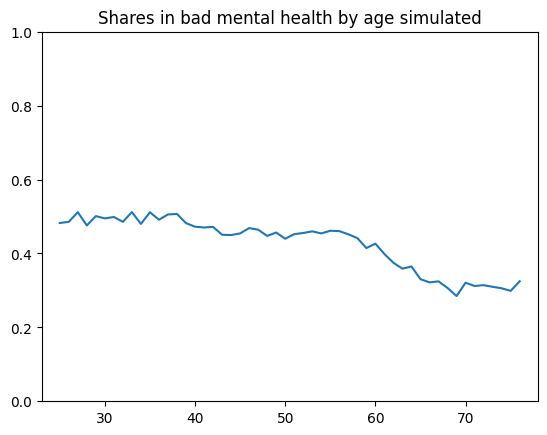

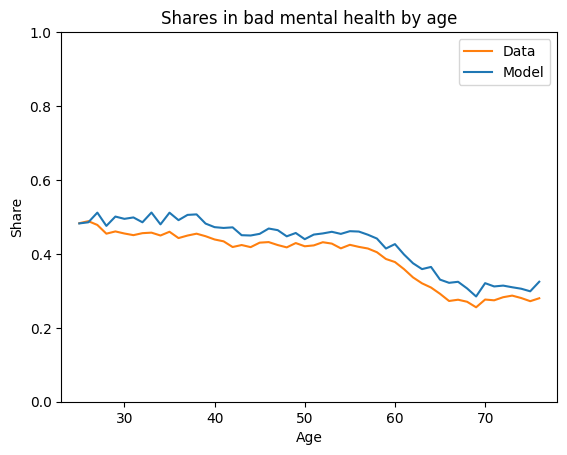

In [3]:

import model_uncert as model
import matplotlib.pyplot as plt
import pandas as pd
import my_toolbox as tb
import os

H_hist = myShocks.H_hist

shares_y_lim = [0, 1.0]
# shares in bad health by earnings (maybe later by wage, hours, etc)
age_grid = myPars.age_grid
bad_MH_age_data = pd.read_csv(input_path + "mean_bad_MH_by_age.csv")
print(bad_MH_age_data.head())
# get second column as numpy array
bad_MH_age_data = bad_MH_age_data.to_numpy()
# plot shares in bad health by age
fig_bad_MH_data, ax_bad_MH_data = plt.subplots()
ax_bad_MH_data.plot(age_grid, bad_MH_age_data)
ax_bad_MH_data.set_title("Shares in bad mental health by age data")
ax_bad_MH_data.set_xlim([age_grid[0]-2, age_grid[-1]+2])    
ax_bad_MH_data.set_ylim(shares_y_lim)
plt.show()

# model shares in bad health by age
weighted_H_hist = model.gen_weighted_sim(myPars, H_hist) 
good_MH_age_sim = np.sum(weighted_H_hist, tuple(range(H_hist.ndim - 1)))
bad_MH_age_sim = 1 - good_MH_age_sim
print(bad_MH_age_sim[:5])
# print("good_MH_age_sim", good_MH_age_sim)
# print("bad_MH_age_sim", bad_MH_age_sim)
fig_bad_MH_sim, ax_bad_MH_sim = plt.subplots()
ax_bad_MH_sim.plot(age_grid, bad_MH_age_sim)
ax_bad_MH_sim.set_title("Shares in bad mental health by age simulated")
ax_bad_MH_sim.set_xlim([age_grid[0]-2, age_grid[-1]+2])
ax_bad_MH_sim.set_ylim(shares_y_lim)
plt.show()

label_lists = [["Data"], ["Model"]]
color_list = ["C1", "C0"]
corr_save_path = main_path + "output/H_trans_state_test/"
#if directory doesn't exist create it
if not os.path.exists(corr_save_path):
    os.makedirs(corr_save_path)

fig_comb_bad_MH, ax_comb_bad_MH = tb.combine_plots([(fig_bad_MH_data, ax_bad_MH_data), (fig_bad_MH_sim, ax_bad_MH_sim)],
                                                    comb_fig_title = "Shares in bad mental health by age", x_label = "Age", y_label = "Share", 
                                                    label_lists = label_lists, colors= color_list, save_path = corr_save_path + "shares_bad_MH.pdf")

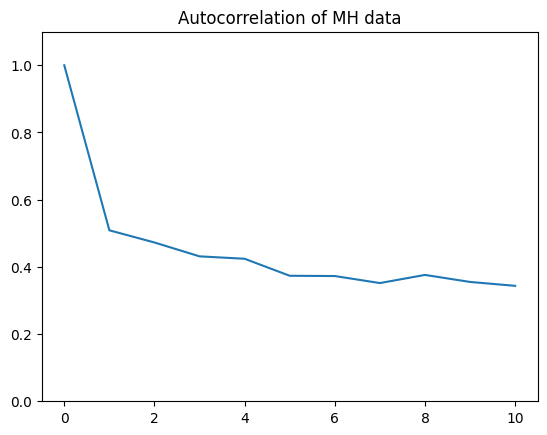

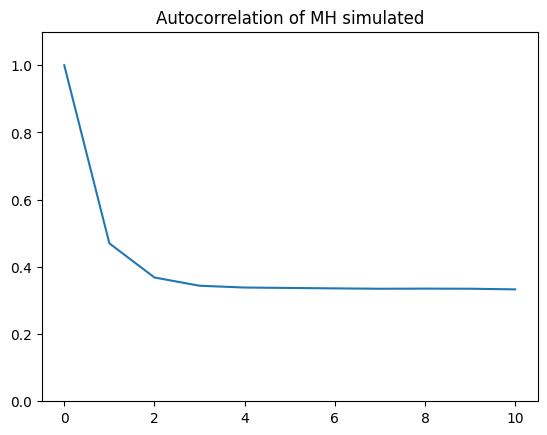

H_hist_ac [1.         0.47004544 0.36838886 0.34387541 0.33851834 0.33726094
 0.33603206 0.3349264  0.33527639 0.33497104 0.33306746]


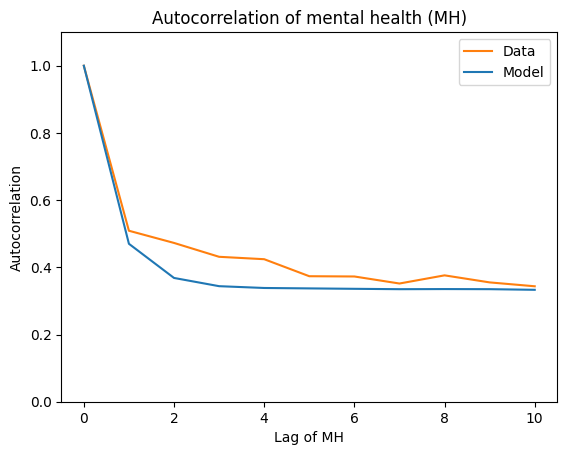

In [4]:
from typing import Tuple

def plot_autocorr(autocorr_data: np.array, var_name: str = None, y_lim: list = [0, 1.1], quietly: bool = False)-> Tuple[plt.Figure, plt.Axes]:
    fig_data, ax_data = plt.subplots()
    ax_data.plot(autocorr_data)
    ax_data.set_title(f"Autocorrelation of {var_name}")
    ax_data.set_ylim(y_lim)
    if not quietly:
        plt.show()
    return fig_data, ax_data


# Plot params
autocorr_y_lim = [0, 1.1]
# Data
autocorr_pd = pd.read_csv(input_path + "autocorr_matrix.csv")
MH_autocorr = autocorr_pd["MH"].values
fig_data_MH, ax_data_MH = plot_autocorr(MH_autocorr, "MH data", autocorr_y_lim, quietly = False)

# Model
H_hist = myShocks.H_hist[:, :, :, :-1]
H_hist_ac = tb.lagged_corr(H_hist, max_lag=10)
fig_sim_H_ac, ax_sim_H_ac = plot_autocorr(H_hist_ac, "MH simulated", autocorr_y_lim)
print("H_hist_ac", H_hist_ac)

# Combine
comb_fig_title_prefix = "Autocorrelation of "
label_lists = [["Data"], ["Model"]]
color_list = ["C1", "C0"]
x_label = "Lag"
y_label = "Autocorrelation"
fig_comb_MH_autocorr, ax_comb_MH_autocorr = tb.combine_plots([(fig_data_MH, ax_data_MH), (fig_sim_H_ac, ax_sim_H_ac)],
                                                                comb_fig_title = comb_fig_title_prefix + "mental health (MH)",  
                                                                x_label = x_label + " of MH", y_label = y_label,
                                                                label_lists = label_lists, colors= color_list, save_path = corr_save_path + "autocorr_MH.pdf")